In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Prepare Data set

In [3]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

# class = 0 is red wine
# class = 1 is white wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


Data information

In [4]:
wine.info()
# 'non-null' means is there are no missing value.
# If missing value is exist, we have to fill the blank with mean value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


Data Description

In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


Data Processing (Sampling, Standardlization)

In [6]:
col = list(wine.columns)

wine_input  = wine[col[:3]].to_numpy()
wine_target = wine[col[3]] 

# means of test_size 0.2 is that we admit attract the test data set 20% 
# Sampling
sli = train_test_split(wine_input, wine_target, test_size=0.2, random_state=42)
train_input = sli[0]
train_target = sli[2]
test_input = sli[1]
test_target = sli[3]

# Check data set size (train:test = 8:2)
print(train_input.shape, test_input.shape)
set_num = train_input.shape[0] + test_input.shape[0]
print("Train Size  : ", np.round(train_input.shape[0]), end="    ")
print("Test Size  : ", np.round(test_input.shape[0]), end="\n")
print("Train Size% : ", np.round(train_input.shape[0]/set_num*100), end="    ")
print("Test Size% : ", np.round(test_input.shape[0]/set_num*100), "%", end="\n\n")

# Standardlization
ss = StandardScaler()
ss.fit(train_input)
train_scaled_input = ss.transform(train_input)
test_scaled_input  = ss.transform(test_input)

lr = LogisticRegression()
lr.fit(train_scaled_input, train_target)

score_train  = lr.score(train_scaled_input, train_target)
score_test   = lr.score(test_scaled_input, test_target)
score_differ = score_train - score_test

print("Score:")
print("Score Train  : ", score_train)
print("Score Test   : ", score_test)
print("Score Differ : ", score_differ, end="\n\n")

print("Trained value:")
print("Coefficient : ", lr.coef_)
print("Intercept   : ", lr.intercept_)

(5197, 3) (1300, 3)
Train Size  :  5197    Test Size  :  1300
Train Size% :  80.0    Test Size% :  20.0 %

Score:
Score Train  :  0.7808350971714451
Score Test   :  0.7776923076923077
Score Differ :  0.0031427894791373756

Trained value:
Coefficient :  [[ 0.51270274  1.6733911  -0.68767781]]
Intercept   :  [1.81777902]


#### <b> Decision Tree </b>
Decision Tree model have question to divide the data.   
Answer about question is 'yes' of 'no'.  

<b>For example: </b>   
Is the sugar  content smaller than 2 ?  
yes -> red wine  
no  -> white wine  

In [7]:
# Declaration
dt = DecisionTreeClassifier(random_state=42)

# Training
dt.fit(train_scaled_input, train_target)

# Score
score_train  = dt.score(train_scaled_input, train_target)
score_test   = dt.score(test_scaled_input, test_target)
score_differ = score_train - score_test

print("Score Train  : ", score_train)
print("Score Test   : ", score_test)
print("Score Differ : ", score_differ, end="\n\n")

# Training set result is very good ! (0.99 ...)
# But test set result is smaller than training set reuslt (0.85 ...)
# difference is little big ! (0.13 ...)
# So, this model is trained over-fitting in training data set

Score Train  :  0.996921300750433
Score Test   :  0.8592307692307692
Score Differ :  0.1376905315196637



Draw Decision Tree


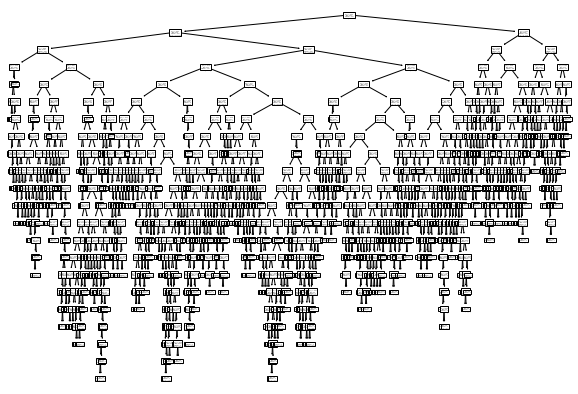

In [8]:
plt.figure(figsize=(10, 7)) ## figure size (10, 7) inches
plot_tree(dt) # draw decision tree
plt.show()

Check Figure in Decision Tree
Above tree is too complex

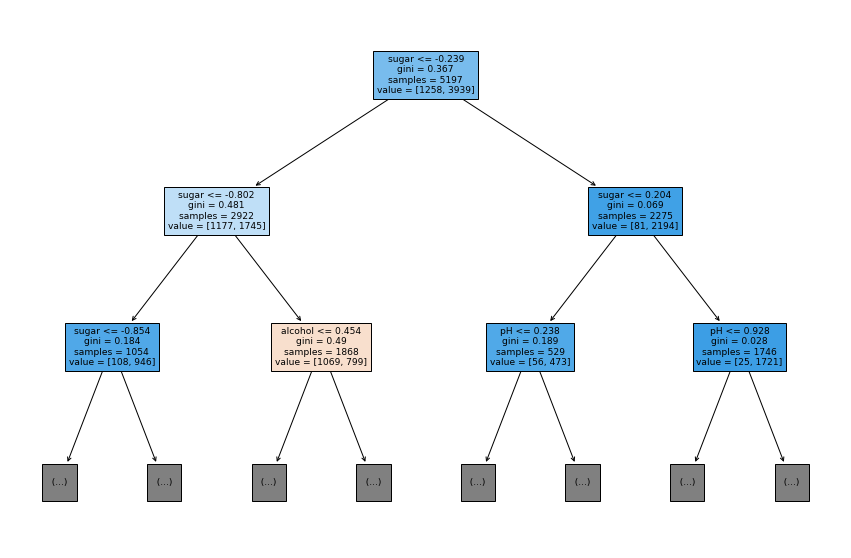

In [9]:
plt.figure(figsize=(15, 10))
plot_tree(dt, max_depth=2, filled=True, feature_names=col[:3])
# sugar <= ?
# Left is Yes(-), Right is No(+)
# max_depth -> tree max depth (start = 0)
# filled    -> fill color 
# samples   -> number of samples
# value     -> number of class samples

# notice: color of node depend on class samples rate
# class samples rate = (-)class / (+)class   
# ex) 3939 - 1258 -> (+) big, white
#     799  - 1069 -> (-) big, red
# difference is bigger than color is thickener 
plt.show()

# way of decision tree prediction depend on leaf node
# (-) red, (+) white
# ex) value = [108, 946]  is white wine
# ex) value = [1069, 799] is red wine

Gini impurity


Limited tree depth and result

In [10]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled_input, train_target)

score_train = dt.score(train_scaled_input, train_target)
score_test  = dt.score(test_scaled_input, test_target)
score_differ = score_train - score_test

print("Score Train  : ", score_train)
print("Score Test   : ", score_test)
print("score Differ : ", score_differ)

# result is not bed
# train is 0.85  : test is 0.84 
# 

Score Train  :  0.8454877814123533
Score Test   :  0.8415384615384616
score Differ :  0.003949319873891688


[Text(558.0, 713.475, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(279.0, 509.625, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(139.5, 305.775, 'sugar <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(69.75, 101.92499999999995, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(209.25, 101.92499999999995, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(418.5, 305.775, 'alcohol <= 0.454\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(348.75, 101.92499999999995, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(488.25, 101.92499999999995, 'gini = 0.468\nsamples = 727\nvalue = [271, 456]'),
 Text(837.0, 509.625, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(697.5, 305.775, 'pH <= 0.238\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(627.75, 101.92499999999995, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(767.25, 101.9249999

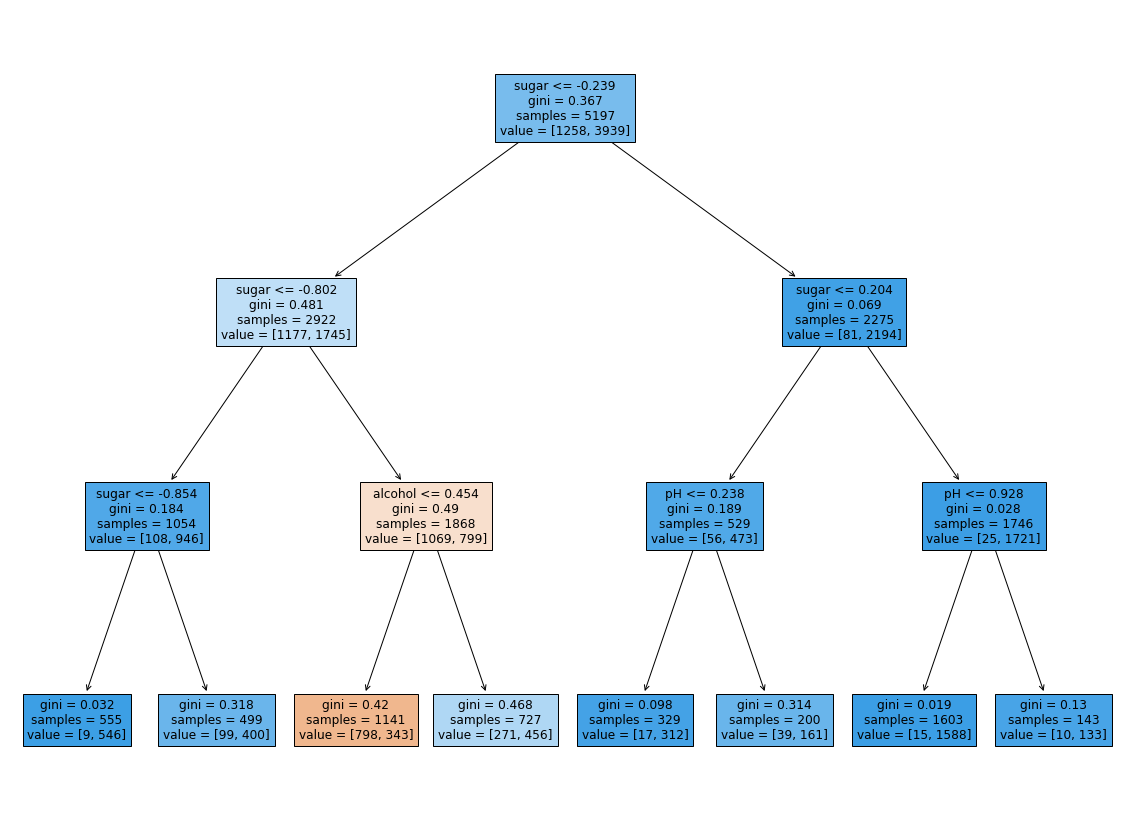

In [11]:
plt.figure(figsize=(20, 15))
plot_tree(dt, max_depth=3, filled=True, feature_names=col[:3])